In [1]:
from DataLoader.dataloader import chestXrayDataset

In [2]:
IMG_PATH = "archive (1)/images_*/*/*"
CSV_PATH = 'archive (1)/Data_Entry_2017.csv'

In [3]:
chestXrayData = chestXrayDataset(IMG_PATH, CSV_PATH)

In [4]:
len(chestXrayData)

100

Image shape: torch.Size([3, 224, 224])
Label: 0


TypeError: Invalid shape (3, 224, 224) for image data

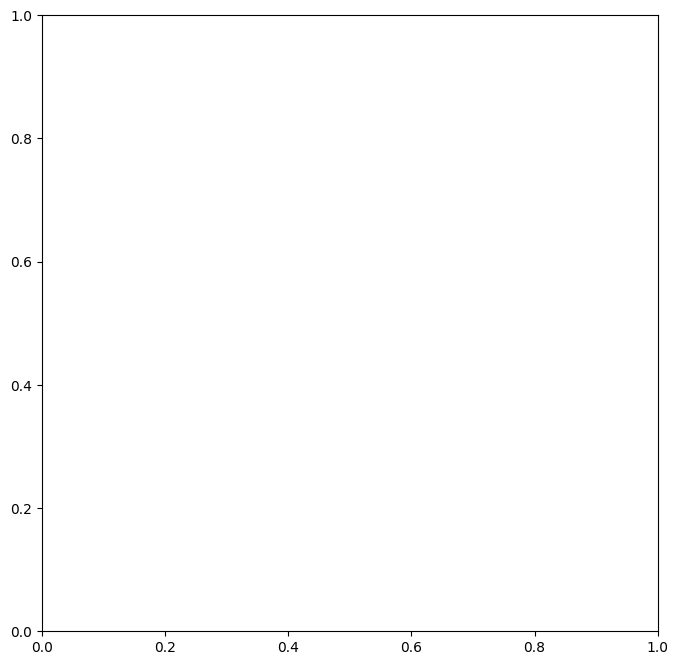

In [5]:
for img, label in chestXrayData:
	print(f"Image shape: {img.shape}")
	
	if hasattr(label, 'to_string'):
		label_str = label.to_string()
	else:
		label_str = str(label)
	
	print(f"Label: {label_str}")
	
	import matplotlib.pyplot as plt
	plt.figure(figsize=(8, 8))
	plt.imshow(img.squeeze(0))
	plt.title(f"Label: {label_str}")
	plt.axis('off')
	plt.show()
	
	break
    

In [ ]:
from torch.utils.data import DataLoader

dataloader = DataLoader(chestXrayData, batch_size=4, shuffle=True)


Batch size: 4
Image shape: torch.Size([4, 3, 224, 224])
Label: tensor([1, 1, 0, 1])


TypeError: Invalid shape (3, 224, 224) for image data

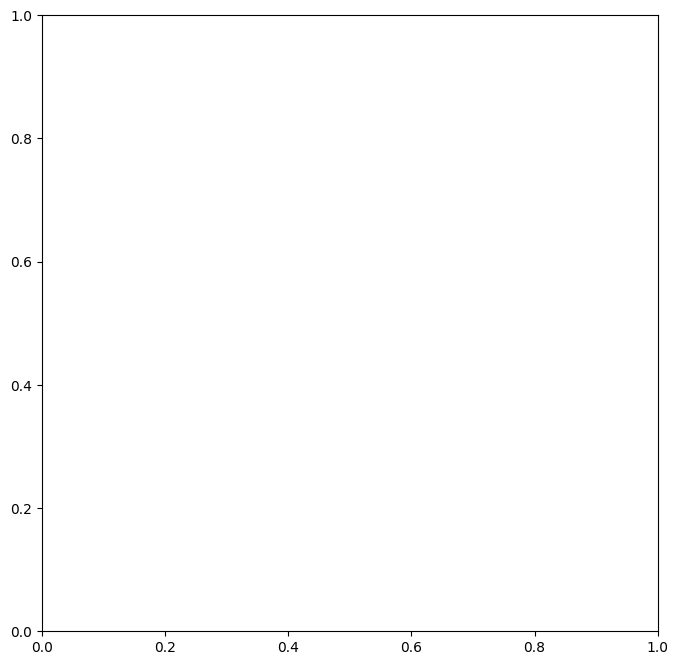

In [ ]:
for img, label in dataloader:
	batch_size = img.shape[0]
	print(f"Batch size: {batch_size}")
	print(f"Image shape: {img.shape}")
	print(f"Label: {label}")
	
	import matplotlib.pyplot as plt
	plt.figure(figsize=(8, 8))
	plt.imshow(img[0].squeeze(0), cmap='gray')
	plt.title(f"Label: {label[0]}")
	plt.axis('off')
	plt.show()
	
	break

In [6]:
import timm
import torch.nn as nn

In [7]:
model = timm.create_model('vit_base_patch16_224', pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_features = model.head.in_features
model.head = nn.Linear(num_features, 2)  

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [9]:
from Train.trainLoop import train_model
import torch
from torch.utils.data import random_split, DataLoader

train_size = int(0.8 * len(chestXrayData))
val_size = len(chestXrayData) - train_size
train_dataset, val_dataset = random_split(chestXrayData, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

train_model(model, train_loader, val_loader, 'mps', criterion, optimizer,'bestmodel.pt')


Training completed!
